# Import Data

In [1]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

In [2]:
train_path = os.path.join('datasets', 'train.csv')
test_path = os.path.join('datasets', 'test.csv')

train, test = pd.read_csv(train_path), pd.read_csv(test_path)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test.shape

(418, 11)

# Analyze Data

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Summary of numerical features

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Summary of categorical features

In [9]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Parr, Mr. William Henry Marsh",male,347082,G6,S
freq,1,577,7,4,644


### We will now explore these various features and how they are connected to survival

### 1. Survivals
0 = Not survived
1 = Survived

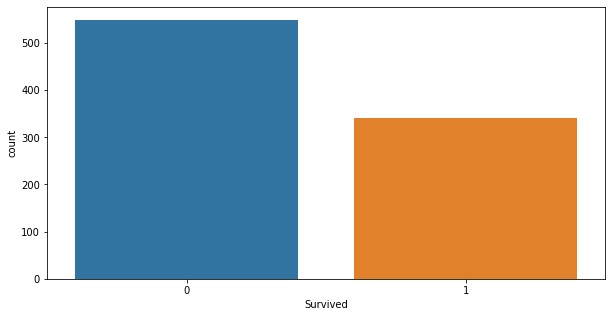

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Survived')
plt.show()

### 2. Pclass
1 = 1st, 2 = 2nd, 3 = 3rd

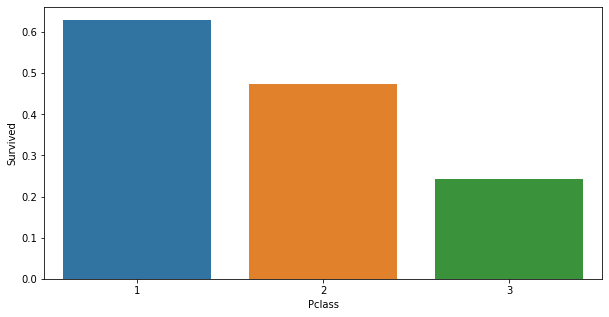

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(data=train, x='Pclass', y='Survived', ci=None)
plt.show()

### 3. Age
**Age missing values:** 177

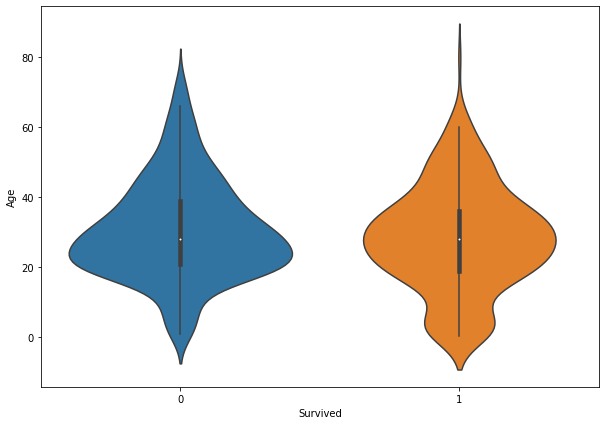

In [12]:
plt.figure(figsize = (10, 7))
sns.violinplot(y = 'Age', x = 'Survived', data = train)
plt.show()

### 4. SibSp
siblings / spouses aboard the Titanic

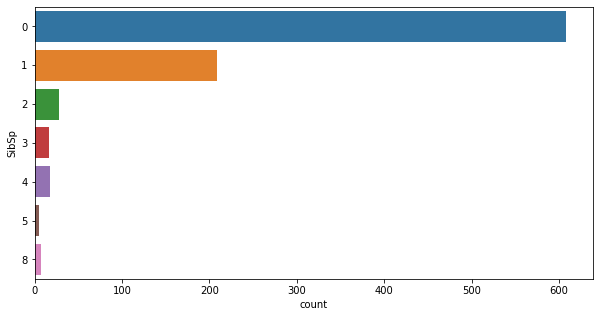

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, y='SibSp')
plt.show()

The majority of passengers did not have a spouse or sibling

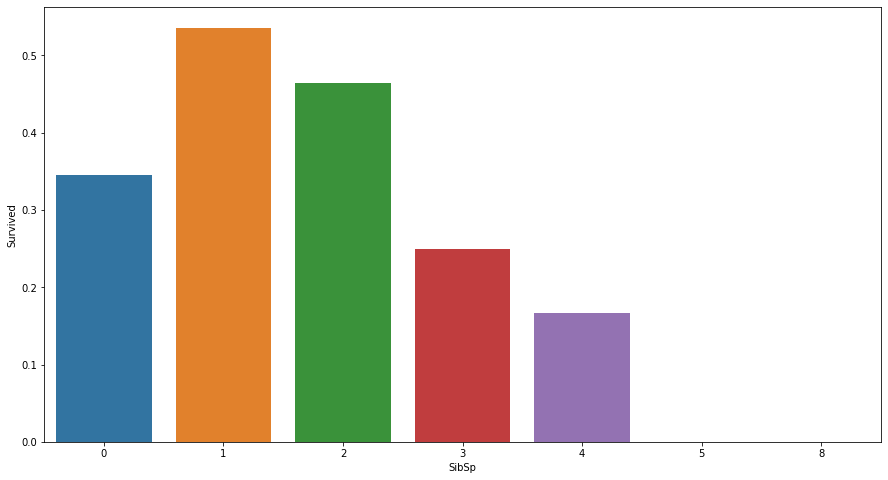

In [14]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=train, x='SibSp', y='Survived', ci=False)
plt.show()

### 5. Parch
parents / children aboard the Titanic

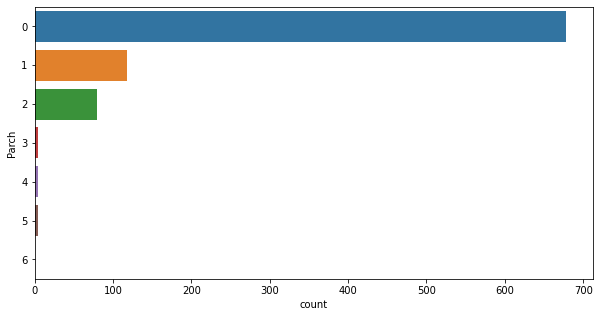

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, y='Parch')
plt.show()

The majority of passengers did not have a parents or children

### 6. Fare

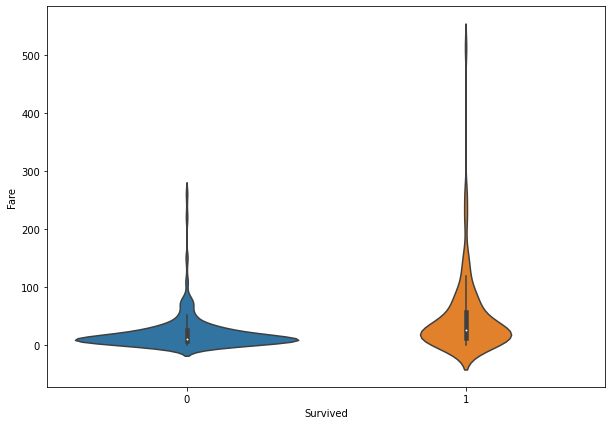

In [16]:
plt.figure(figsize = (10, 7))
sns.violinplot(y = 'Fare', x = 'Survived', data = train)
plt.show()

Seems like is not a relevant data

### 7. Sex

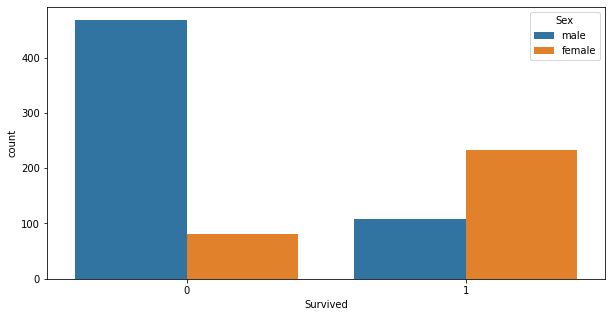

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, x='Survived', hue='Sex')
plt.show()

We can see the vast majority who died was men.

### 8. Embarked

C = Cherbourg, Q = Queenstown, S = Southampton

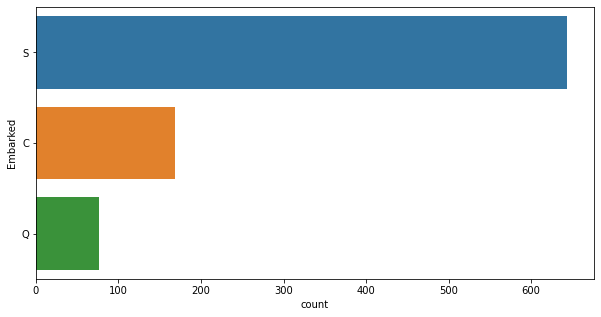

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train, y='Embarked')
plt.show()

The majority of the passangers embarked from Southampton

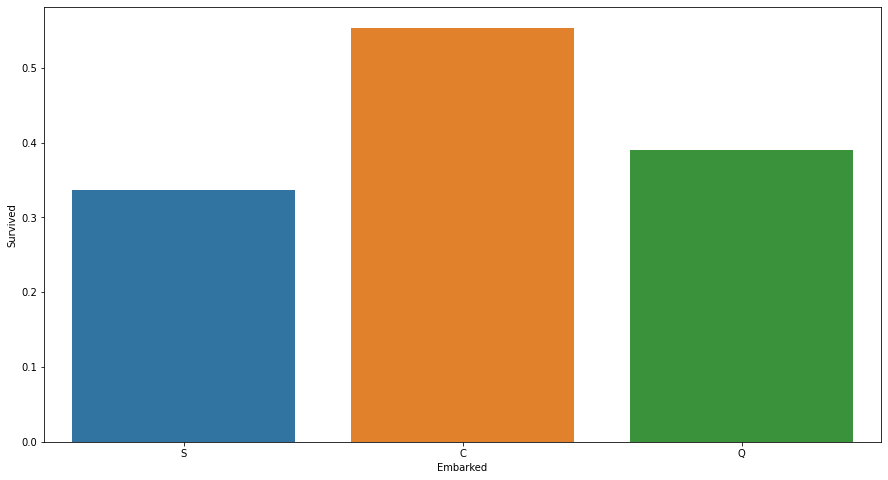

In [19]:
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=train, x='Embarked', y='Survived', ci=False)
plt.show()

## Looking for Correlations in numerical values

In [20]:
corr_matrix = train.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

# Prepare the Data

I consider Pclass features like a categorical, because de scalar value represent a category.

In [21]:
num_features = ['Fare', 'Parch', 'SibSp', 'Age']
cat_features = ['Sex', 'Pclass']
train_prepared = train[num_features + cat_features]

In [22]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('hot_encoder', OneHotEncoder())
])

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [23]:
X_train = full_pipeline.fit_transform(train_prepared)
y_train = train['Survived']

# Select and Train a Model

## SGDClassifier

In [24]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier()

In [25]:
scores = cross_val_score(sgd_clf, X_train, y_train, scoring='accuracy', cv=3)

In [26]:
print('SGD Classfier score:', scores.mean())
print('SGD Classfier loss:', scores.std())

SGD Classfier score: 0.745230078563412
SGD Classfier loss: 0.0473247332038339


In [27]:
sgd_scores = [scores.mean(), scores.std()]

## Logistic Regression

In [28]:
param_grid = {'C': np.arange(0.5, 10.5, 0.5),
              'penalty': ['l1', 'l2']}

gs = GridSearchCV(estimator=LogisticRegression(),
                  param_grid=param_grid, cv=3, scoring='accuracy',
                  verbose=0, n_jobs=-1)

grid_result = gs.fit(X_train, y_train)

In [29]:
best_params = grid_result.best_params_
lr_model = grid_result.best_estimator_

In [30]:
scores = cross_val_score(lr_model, X_train, y_train, scoring='accuracy', cv=3)

In [31]:
print('Logistic Regression CV score:', scores.mean())
print('Logistic Regression CV loss:', scores.std())
print('Best Logistic Regression Parameters:', best_params)

Logistic Regression CV score: 0.7890011223344556
Logistic Regression CV loss: 0.0015872206087240053
Best Logistic Regression Parameters: {'C': 0.5, 'penalty': 'l2'}


In [32]:
log_scores = [scores.mean(), scores.std()]

## Support Vector Classifier

In [33]:
param_grid = {'gamma': ['scale', 'auto'],
              'kernel': ['poly', 'rbf', 'sigmoid'],
              'C' : [1e-4, 5e-4, 1e-3, 5e-3, 0.01, 0.05, 0.1, 0.5, 1., 1.5, 2, 3, 4, 5, 6, 7],
              'degree': np.arange(1, 11, 1)}

#define the grid search
gs = GridSearchCV(estimator = SVC(),
                  param_grid = param_grid, cv = 3, scoring = 'accuracy', 
                  verbose = 0, n_jobs = -1)

#train the grid search
grid_result = gs.fit(X_train, y_train)

In [34]:
best_params = grid_result.best_params_
svc_model = grid_result.best_estimator_

In [35]:
scores = cross_val_score(svc_model, X_train, y_train, scoring='accuracy', cv=3)

In [36]:
print('Support Vector Classifier score:', scores.mean())
print('Support Vector Classifier loss:', scores.std())
print('Best Logistic Regression Parameters:', best_params)

Support Vector Classifier score: 0.8282828282828283
Support Vector Classifier loss: 0.00991218952449815
Best Logistic Regression Parameters: {'C': 1.5, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}


In [37]:
svc_scores = [scores.mean(), scores.std()]

## Decision Tree

In [38]:
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': np.arange(2, 15, 1),
              'min_samples_split': np.arange(2, 8, 1)}

#define the grid search
gs = GridSearchCV(estimator = DecisionTreeClassifier(),
                  param_grid = param_grid, cv = 3, scoring = 'accuracy', 
                  verbose = 0, n_jobs = -1)

#train the grid search
grid_result = gs.fit(X_train, y_train)

In [39]:
best_params = grid_result.best_params_
dtc_model = grid_result.best_estimator_

In [40]:
scores = cross_val_score(dtc_model, X_train, y_train, scoring='accuracy', cv=3)

In [41]:
print('Decision Tree score:', scores.mean())
print('Decision Tree loss:', scores.std())
print('Best Logistic Regression Parameters:', best_params)

Decision Tree score: 0.7979797979797979
Decision Tree loss: 0.02250273586505438
Best Logistic Regression Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 4, 'splitter': 'random'}


In [42]:
dtc_scores = [scores.mean(), scores.std()]

## Random Forest

In [43]:
param_grid = {'criterion': ['gini', 'entropy'],
              'n_estimators': np.arange(100, 1000, 100)}

#define the grid search
gs = GridSearchCV(estimator = RandomForestClassifier(),
                  param_grid = param_grid, cv = 3, scoring = 'accuracy', 
                  verbose = 0, n_jobs = -1)

#train the grid search
grid_result = gs.fit(X_train, y_train)

In [44]:
best_params = grid_result.best_params_
rfc_model = grid_result.best_estimator_

In [45]:
scores = cross_val_score(rfc_model, X_train, y_train, scoring='accuracy', cv=3)

In [46]:
print('Random Forest score:', scores.mean())
print('Random Forest loss:', scores.std())
print('Best Logistic Regression Parameters:', best_params)

Random Forest score: 0.8159371492704827
Random Forest loss: 0.023702258228892145
Best Logistic Regression Parameters: {'criterion': 'entropy', 'n_estimators': 800}


In [47]:
rfc_scores = [scores.mean(), scores.std()]

## AdaBoost

In [48]:
base_estimator = [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=5),
                  DecisionTreeClassifier(max_depth=10)]

param_grid = {'base_estimator': base_estimator,
              'n_estimators': np.arange(50, 500, 50),
              'learning_rate': np.arange(0.1, 2., 0.2),
              'algorithm': ['SAMME', 'SAMME.R']}

#define the grid search
gs = GridSearchCV(estimator = AdaBoostClassifier(),
                  param_grid = param_grid, cv = 3, scoring = 'accuracy', 
                  verbose = 0, n_jobs = -1)

#train the grid search
grid_result = gs.fit(X_train, y_train)

In [49]:
best_params = grid_result.best_params_
ada_model = grid_result.best_estimator_

In [50]:
scores = cross_val_score(rfc_model, X_train, y_train, scoring='accuracy', cv=3)

In [51]:
print('AdaBoost score:', scores.mean())
print('AdaBoost loss:', scores.std())
print('Best Logistic Regression Parameters:', best_params)

AdaBoost score: 0.8193041526374859
AdaBoost loss: 0.024793178489758184
Best Logistic Regression Parameters: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.5000000000000001, 'n_estimators': 150}


In [52]:
ada_scores = [scores.mean(), scores.std()]

## Voting Classifier

In [53]:
model_voting = VotingClassifier(estimators=[
    ('sgd', sgd_clf),
    ('lr', lr_model),
    ('svc', svc_model),
    ('dtc', dtc_model),
    ('rfc', rfc_model),
    ('ada', ada_model)
], voting='hard')

model_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('sgd', SGDClassifier()),
                             ('lr', LogisticRegression(C=0.5)),
                             ('svc', SVC(C=1.5, degree=1, gamma='auto')),
                             ('dtc',
                              DecisionTreeClassifier(max_depth=5,
                                                     min_samples_split=4,
                                                     splitter='random')),
                             ('rfc',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=800)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=DecisionTreeClassifier(max_depth=5),
                                                 learning_rate=0.5000000000000001,
                                                 n_estimators=150))])

In [54]:
scores = cross_val_score(model_voting, X_train, y_train, scoring='accuracy', cv=3)

In [55]:
print('Voting Classifier score:', scores.mean())
print('Voting Classifier loss:', scores.std())
print('Best Logistic Regression Parameters:', best_params)

Voting Classifier score: 0.8204264870931538
Voting Classifier loss: 0.0057228052902276024
Best Logistic Regression Parameters: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=5), 'learning_rate': 0.5000000000000001, 'n_estimators': 150}


In [56]:
voting_scores = [scores.mean(), scores.std()]

# Save best model

The SVC model is the best model with high accuracy and low loss.

In [57]:
print('SVC score:', svc_scores[0])
print('SVC loss:', svc_scores[1])

SVC score: 0.8282828282828283
SVC loss: 0.00991218952449815


In [58]:
import joblib

joblib.dump(svc_model, 'svc_model.sav')

['svc_model.sav']

# Predict Test Set

In [59]:
test_prepared = test[num_features + cat_features]
X_test = full_pipeline.fit_transform(test_prepared)

In [60]:
y_test = svc_model.predict(X_test)

In [61]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
y_pred = pd.DataFrame({'Survived': y_test})

results = pd.concat([test['PassengerId'], y_pred], axis=1, sort=False)
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [63]:
results.to_csv('results.csv', index=False)